<a href="https://colab.research.google.com/github/Dhavalkumar510/Final_Year_Project_UH/blob/main/Final_Year_Project_UH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary Libraray Functions

In [90]:
pip install yfinance

In [91]:
import yfinance as yf
from datetime import datetime
import numpy as np
import yfinance as yf  # Yahoo Finance API for downloading stock market data.
from datetime import datetime
import numpy as np  # Numerical Python for computations and array manipulation.
import pandas as pd  # Data manipulation and analysis library.
import seaborn as sns
# seaborbn is usefull for beautiful statistical graphics.
import matplotlib.pyplot as plt
# For creating 2D plots and better visualizations.
import matplotlib.image as mpimg
from prophet import Prophet
# A forecasting library developed by Facebook for time-series analysis.
from prophet.plot import plot_plotly, plot_components_plotly
# Crating an interactive and component-based Prophet plots.
from tensorflow.keras.models import Sequential
# Sequential API for building deep learning models in TensorFlow.
"""
TensorFlow is an open-source machine learning library for building and training
deep learning models. It supports neural networks like RNNs, LSTMs, and enables
high-performance computations on GPUs/CPUs.
Keras is a high-level API built on TensorFlow for easy and fast creation of
deep learning models. It simplifies model building with pre-defined layers and
supports neural networks like LSTMs and CNNs.
"""
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# This is useful for generating time-series data for model training.
from sklearn.model_selection import train_test_split
# For splitting data into our requirements
from sklearn.preprocessing import MinMaxScaler
# MinimaxScaler scales data to a range of [0, 1].
from keras.models import Sequential  # Sequential API for building models.
"""
Sequential is a Keras API for building neural networks layer by layer in a
linear stack. It is ideal for models where each layer has one input tensor and
one output tensor.
"""
from keras.layers import LSTM, Dense, Dropout, Bidirectional,BatchNormalization
# Layers for building LSTM models.
"""
# LSTM: A type of recurrent neural network layer that captures long-term
dependencies in time-series data.
# Dense: A fully connected layer where each neuron is connected to every input
from the previous layer.
# Dropout: A regularization technique that randomly disables a fraction of
neurons during training to prevent overfitting.
# Bidirectional: An LSTM layer that processes input sequences in both forward
and backward directions for better context understanding.
# BatchNormalization: A layer that normalizes inputs within a mini-batch,
improving stability and speeding up training.
"""
from keras.optimizers import Adam  # Adam for training deep learning models.
from keras.callbacks import EarlyStopping
# Callback for stopping training early if no improvement is observed.
from tensorflow.keras.utils import plot_model
# Statistical forecasting models
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Holt-Winters method for time-series forecasting.
"""
ExponentialSmoothing: A statistical forecasting model that uses weighted
averages of past observations. It supports trend and seasonality components
for time-series forecasting.
"""
import itertools    # For creating combinations of parameters(mathematical)
import math
from math import sqrt
# Seasonal ARIMA with exogenous variables for time-series forecasting.
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

Downloading the LBG(Lloyds Banking Group) data

In [92]:
# Defining the stock ticker (Lloyds Banking Group PLC)
ticker = 'LLOY.L'
# Getting the data untill today's date in dd-mm-yyyy format
today = datetime.today().strftime('%d-%m-%Y')

# Fetch historical data until today
yf_data = yf.download(ticker, start='2010-01-01',
                      end=datetime.today().strftime('%Y-%m-%d'))

# Converting  the index to format of dd-mm-yyyy
yf_data.index = yf_data.index.strftime('%d-%m-%Y')

data = yf_data

# Displaying the DataFrame

print(pd.DataFrame(data.head(15)))
print("\n","-"*70)
print(pd.DataFrame(data.tail(15)))

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker         LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L
Date                                                                        
04-01-2010  36.779495  52.259998  52.259998  51.099998  51.400002  167623403
05-01-2010  38.025181  54.029999  54.759998  52.200001  52.500000  233026957
06-01-2010  38.419300  54.590000  55.230000  53.169998  55.000000  142079248
07-01-2010  40.066143  56.930000  57.070000  54.000000  54.860001  216171360
08-01-2010  40.045029  56.900002  57.520000  56.160000  56.990002  178033888
11-01-2010  39.503124  56.130001  57.950001  55.630001  57.799999  169834032
12-01-2010  39.390518  55.970001  56.290001  55.080002  55.590000  189050155
13-01-2010  39.411633  56.000000  56.200001  55.160000  55.639999  117598072
14-01-2010  40.467300  57.500000  58.000000  56.580002  57.000000  225878876
15-01-2010  39.960575  56.779999  58.509998  56.599998  57.709999  241352597

### Missing Values
Checking the dataset if there is null value or not.

In [93]:
print("Missing values before handling:")
print(data.isnull().sum())

Missing values before handling:
Price      Ticker
Adj Close  LLOY.L    0
Close      LLOY.L    0
High       LLOY.L    0
Low        LLOY.L    0
Open       LLOY.L    0
Volume     LLOY.L    0
dtype: int64


In [94]:
# Saving the data to a CSV file for future preference
data.to_csv("Lloyds_Bank_Data.csv")

# Opening Price

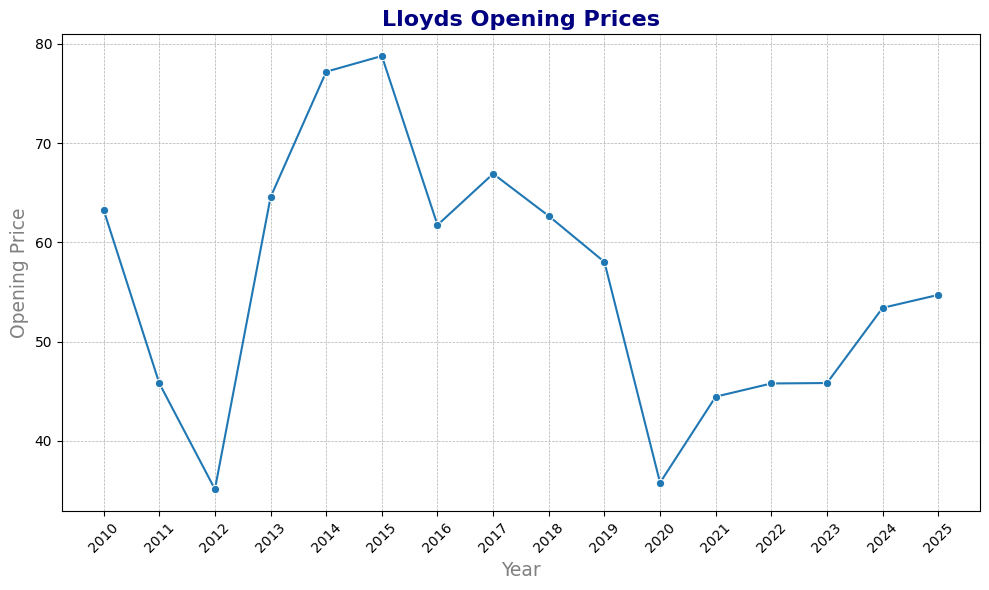

In [95]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Open'].values.ravel(),
             color='#1f77b4', marker='o', errorbar=None)
"""
.values converts this column into a NumPy array.
.ravel() flattens the array to ensure it's one-dimensional,
removing any extra dimensions.
"""
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=13.5, color='gray')
plt.ylabel('Opening Price', fontsize=13.5, color='gray')

# Setting the x-ticks
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)
"""
range(years.min(), years.max() + 1) creates a sequence of integers from
the minimum year to the maximum year (inclusive).
"""

plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Closing Price

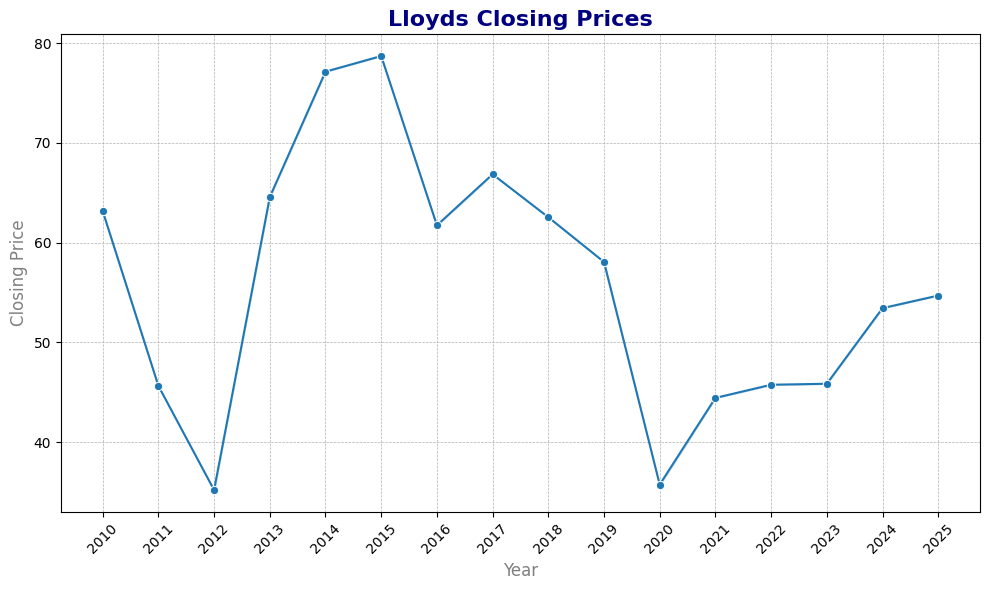

In [96]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Close'].values.ravel(),
             errorbar= ("ci", 0) , color='#1f77b4', marker='o')
plt.title('Lloyds Closing Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Closing Price', fontsize=12, color='gray')

# Setting the x-ticks
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Graph with 2 moving Average

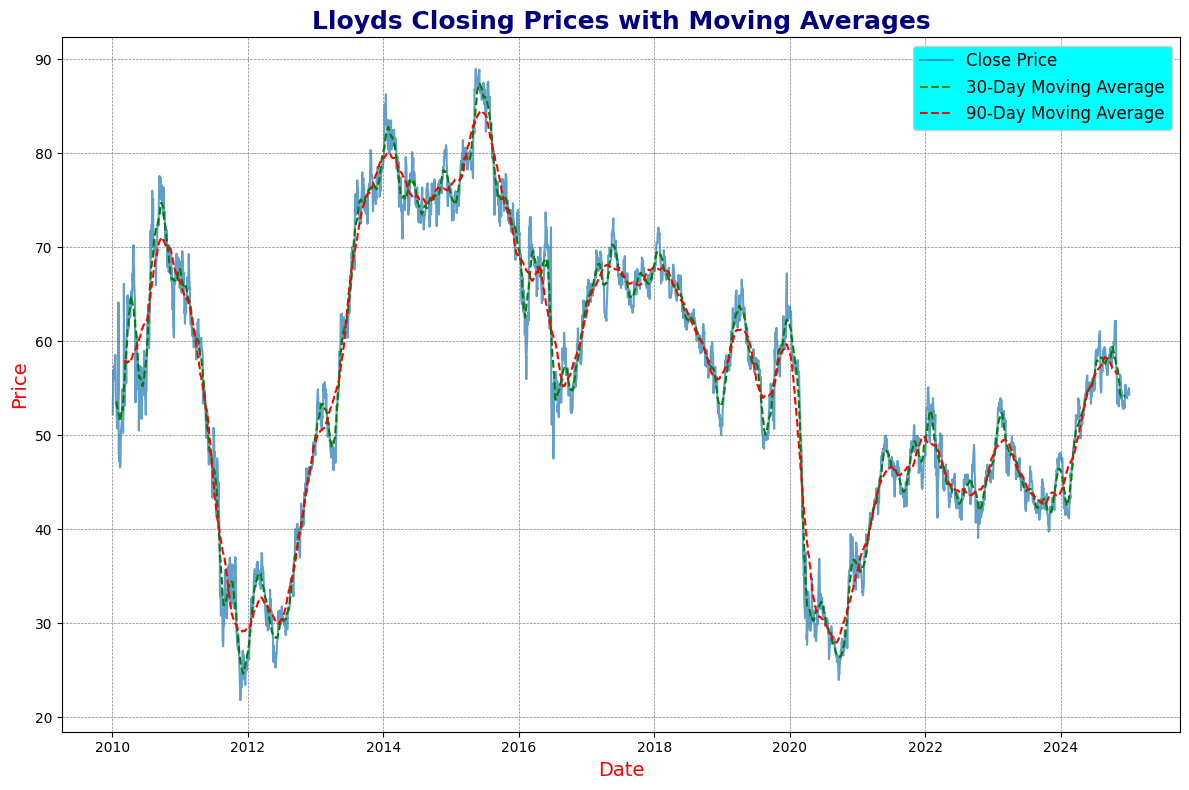

In [97]:
# Ensuring again that time the index is in datetime format
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Calculating 2 different Moving Averages for Closing Prices
data['MA_30'] = data['Close'].rolling(window=30, center=True).mean()
data['MA_90'] = data['Close'].rolling(window=90, center=True).mean()
# 30-day & 90-day moving average

# Plotting the Close Prices along with Moving Averages
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Close Price', color='#1f77b4',
         alpha=0.7, linewidth=1.5)  # Blue for close price
plt.plot(data.index, data['MA_30'], label='30-Day Moving Average',
         color='green', linestyle='--', linewidth=1.5)  # Orange for MA_30
plt.plot(data.index, data['MA_90'], label='90-Day Moving Average',
         color='red', linestyle='--', linewidth=1.5)  # Green for MA_90

# Adding the labels and title
plt.title('Lloyds Closing Prices with Moving Averages', fontsize=18,
          color='navy', weight='bold')
plt.xlabel('Date', fontsize=14, color='Red')
plt.ylabel('Price', fontsize=14, color='Red')

# Adding a legend with a colored box
legend = plt.legend(frameon=True, loc='upper right', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
# Add grid
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()



In [98]:
data.drop(columns=["MA_30", "MA_90"], inplace=True)
# inplace=True modifies the original DataFrame directly,
# rather than creating a new one.
data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
Date,,,,,,
2010-01-04,36.779495,52.259998,52.259998,51.099998,51.400002,167623403
2010-01-05,38.025181,54.029999,54.759998,52.200001,52.500000,233026957
2010-01-06,38.419300,54.590000,55.230000,53.169998,55.000000,142079248
2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360
2010-01-08,40.045029,56.900002,57.520000,56.160000,56.990002,178033888
2010-01-11,39.503124,56.130001,57.950001,55.630001,57.799999,169834032
2010-01-12,39.390518,55.970001,56.290001,55.080002,55.590000,189050155
2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072


# LSTM Model

##1.1  Building a Model



In [145]:
scaler = MinMaxScaler()
# MinimaxScaler uses for scale data to a range of [0, 1]
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
# 'values.reshape(-1, 1)' converts into a 2D array with one feature per row

# Preparing the data for LSTM
def create_lstm_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Defining the time step for sequence
time_step = 1260
X, y = create_lstm_dataset(scaled_data, time_step)

# Spliting data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(150, return_sequences=True,
                       input_shape=(time_step, 1))),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(100, return_sequences=False),
    Dropout(0.1),
    Dense(25, activation='tanh', kernel_regularizer='l2'),
    Dense(1)
])

"""
# A Sequential model is a linear stack of layers where each layer has exactly
one input and one output.
# Bidirectional: Wraps the LSTM layer to process the input sequence in both
forward and backward directions.
# LSTM(100): A Long Short-Term Memory (LSTM) layer with 100 units (neurons).
It captures temporal dependencies in the data.
# return_sequences=True: LSTM layer returns the full sequence of outputs
for each time step (not just the last one).
# input_shape=(time_step, 1): Specifies the shape of the input
data (time steps and features). 'time_step' is the number of previous time
steps used for prediction, and 1 indicates one feature (e.g., stock price).
# Dropout: is a regularization technique that randomly sets a fraction
(here 30%) of input units to 0 during training to prevent overfitting.

# BatchNormalization(): Normalizes the inputs to the layer, stabilizing
and speeding up training by reducing internal covariate shift.

# Dense layer with 25 units (neurons). Each unit receives input from all
neurons of the previous layer.
# activation='relu': (ReLU) function to introduce non-linearity.
# kernel_regularizer='l2': Applies L2 regularization to the weights, helping
to prevent overfitting by penalizing large weights.
# Final Dense layer with a single unit, typically used for regression tasks
(outputting a single prediction, e.g., predicted stock price).
"""
# Compiling the model
optimizer = Adam(learning_rate=0.001)
"""Adam optimizer is initialized with a learning rate of 0.001, controlling
the step size during optimization.
"""
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

model.build(input_shape=(None, time_step, 1))

# Visualizing the model architecture
plot_model(model, show_shapes=True, show_layer_names=True,
           to_file='lstm_architecture.png')

# Train the model and record history
history = model.fit(
    X_train, y_train,   # Training features and labels.
    validation_data=(X_test, y_test),
    # Validation data for performance evaluation during training.
    epochs=30,          # for 30 iterations over the entire dataset.
    batch_size=32,      # No. samples processed before the model is updated.
    verbose=1           # Displays detailed progress of training for each epoch.
)
"""
history: Stores the training and validation loss/metrics for
each epoch, useful for plotting and analysis later.
"""

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - loss: 0.4612 - mae: 0.1923 - val_loss: 0.3832 - val_mae: 0.3040
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - loss: 0.2595 - mae: 0.0401 - val_loss: 0.2600 - val_mae: 0.2600
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.1693 - mae: 0.0382 - val_loss: 0.1744 - val_mae: 0.2202
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.1092 - mae: 0.0340 - val_loss: 0.1107 - val_mae: 0.1677
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0710 - mae: 0.0336 - val_loss: 0.0687 - val_mae: 0.1165
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.0465 - mae: 0.0308 - val_loss: 0.0433 - val_mae: 0.0833
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 0.0307 - mae: 0.0295 - val_loss: 0.0269 - val_mae: 0.0597
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0210 - mae: 0.0326 - val_loss: 0.0163 - val_mae: 0.0387
Epoch 9/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/

'\nhistory: Stores the training and validation loss/metrics for\neach epoch, useful for plotting and analysis later.\n'

##1.2 Forecasting using LSTM Model

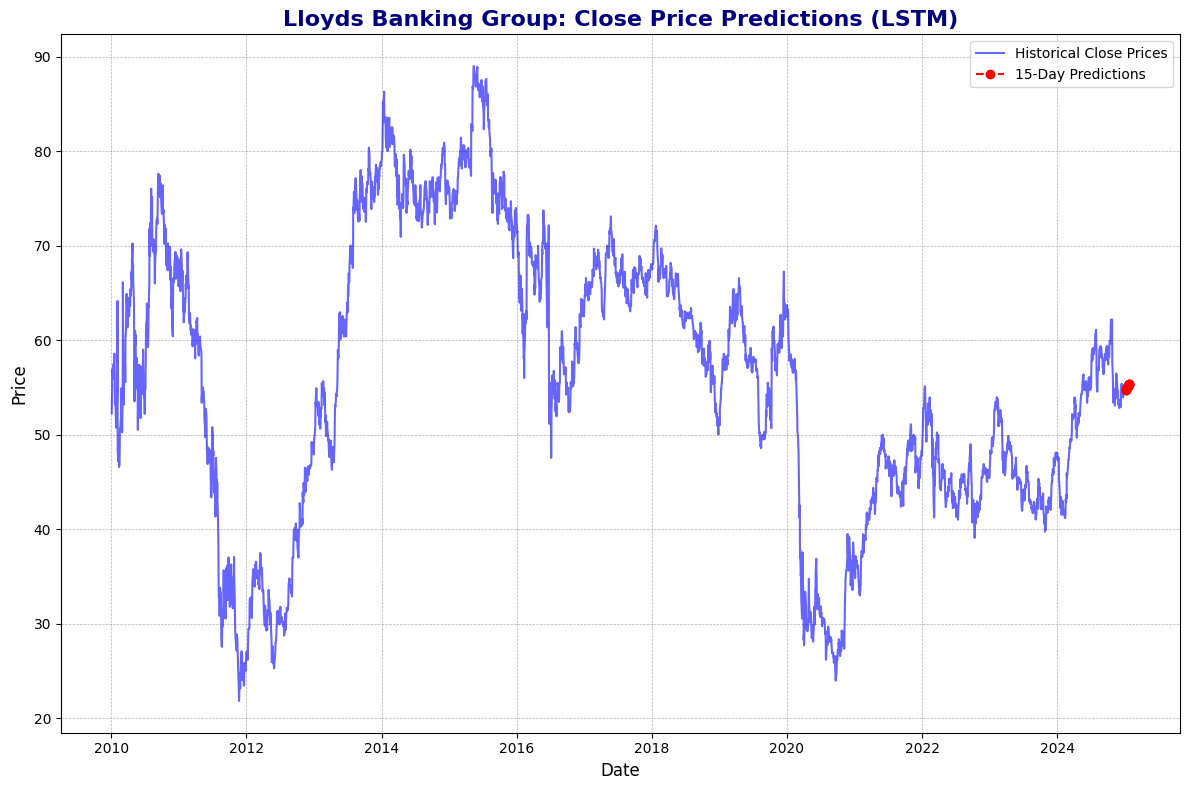

-----------------------------------------------------------------------------------------------------------------------------------------------------------


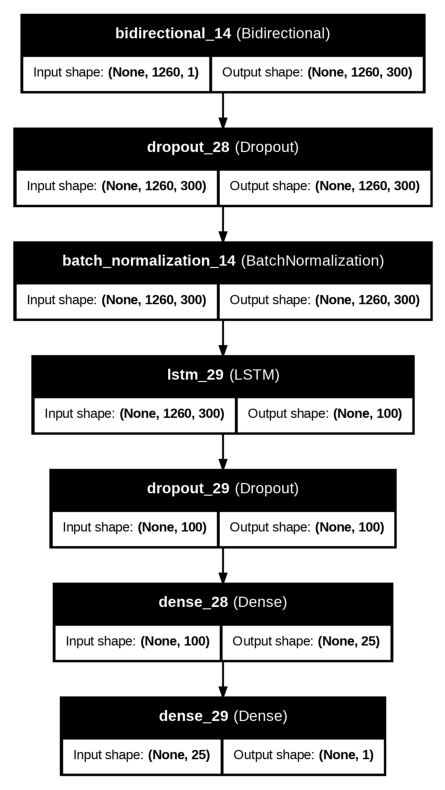

In [146]:
last_sequence = scaled_data[-time_step:]
# Using the last sequence of the training data
future_predictions = []
# Initializing an empty list to store the predicted values for future timesteps.

for _ in range(15):
    prediction = model.predict(last_sequence.reshape(1, time_step, 1),
                               verbose=0)
    # (1, time_step, 1) = (batch_size, time_steps, features)
    future_predictions.append(prediction[0, 0])
    # Saving the prediction for append to new(upcoming) prediction.
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)
    # Updating the last sequence with the new prediction as well

# Inversing scale the predictions back to the original scale in 2D
future_predictions = \
scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generating future dates starting from the last available date in the dataset
future_dates = pd.date_range(start=data.index[-1], periods=16, freq='B')[1:]
"""
'B' stands for upcoming Business days
"""

# Creating a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates,
                          'Predicted Close': future_predictions.ravel()})

# Plotting the predictions along with historical data
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Historical Close Prices',
         color='blue', alpha=0.6)
plt.plot(future_df['Date'], future_df['Predicted Close'],
         label='15-Day Predictions', color='red', linestyle='--', marker='o')
plt.title('Lloyds Banking Group: Close Price Predictions (LSTM)', fontsize=16,
          color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='black')
plt.ylabel('Price', fontsize=12, color='black')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('future_predictions.png')
plt.show()


print(155*"-")
# Displaying the LSTM model architecture image
img = mpimg.imread('lstm_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


##1.2.1 Forecasted Graph using LSTM Model

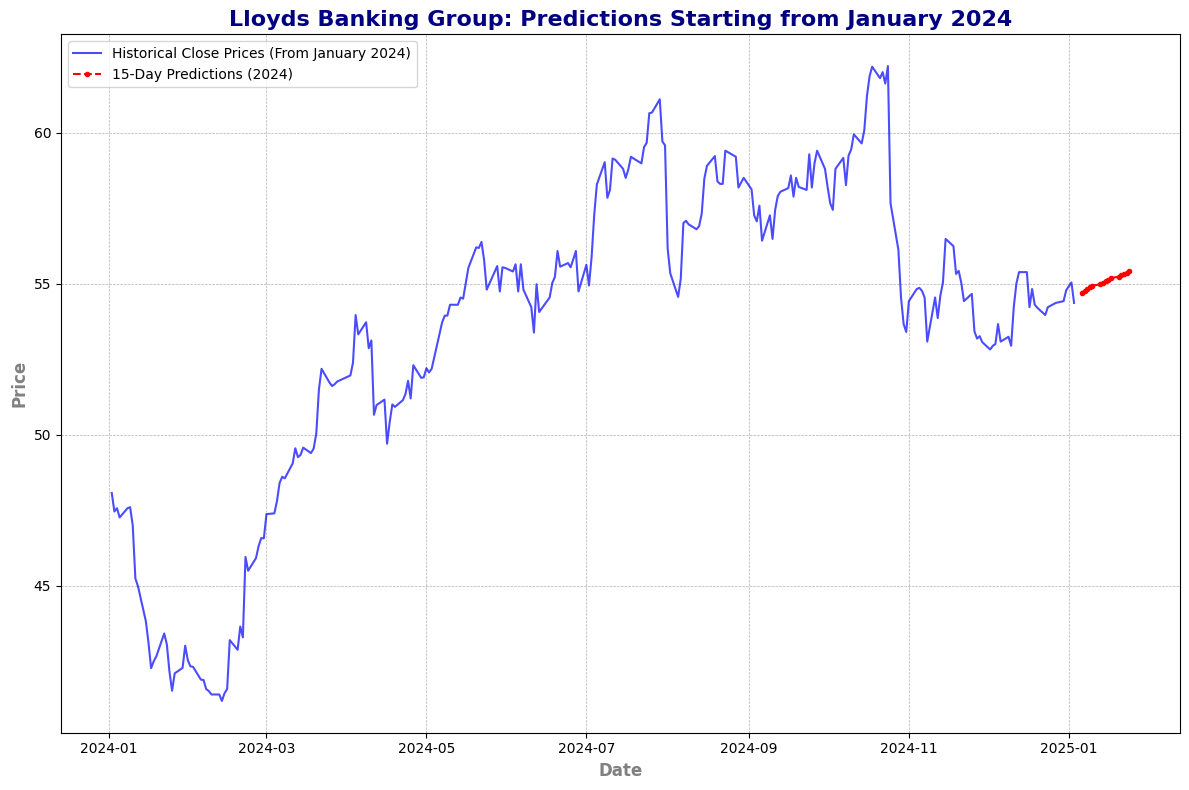

Forecasted Close Prices for the Next 15 Days
         Date  Predicted Close
0  2025-01-06        54.705360
1  2025-01-07        54.764221
2  2025-01-08        54.819084
3  2025-01-09        54.873905
4  2025-01-10        54.927944
5  2025-01-13        54.980896
6  2025-01-14        55.032654
7  2025-01-15        55.083183
8  2025-01-16        55.132523
9  2025-01-17        55.180721
10 2025-01-20        55.227871
11 2025-01-21        55.274063
12 2025-01-22        55.319382
13 2025-01-23        55.363907
14 2025-01-24        55.407722


In [147]:
# Filtering the data starting from January 1, 2024
filtered_data = data[data.index >= '2024-01-01']

# Plotting the subset data with predictions
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'],
         label='Historical Close Prices (From January 2024)',
         color='blue', alpha=0.7)
plt.plot(future_df['Date'], future_df['Predicted Close'],
         label='15-Day Predictions (2024)', color='red',
         linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Predictions Starting from January 2024',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray', weight='bold')
plt.ylabel('Price', fontsize=12, color='gray', weight='bold')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

print("Forecasted Close Prices for the Next 15 Days")
print(future_df)


##1.3  Visualization of Evaluation Metrics

###1.3.1 Graph of Training Loos vs Epoch


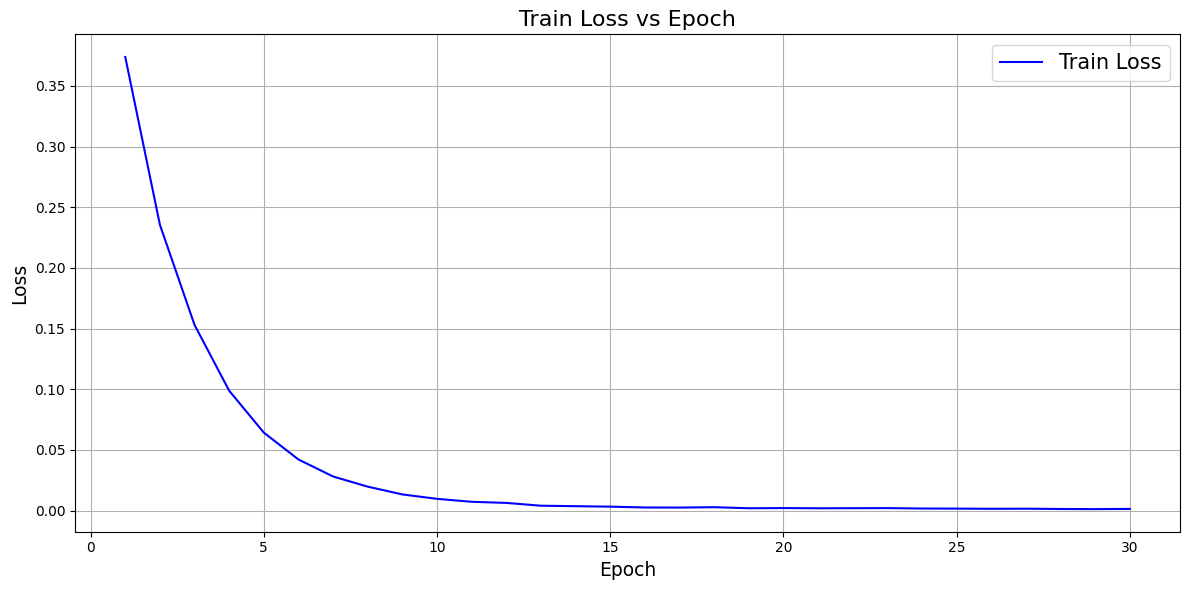

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['loss'],
         label='Train Loss', color='blue')
plt.title('Train Loss vs Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=13.5)
plt.ylabel('Loss', fontsize=13.5)
plt.legend(loc='upper right', fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('Train_loss_vs_epoch.png')
plt.show()

###1.3.2 Graph of Training Mae vs Epoch

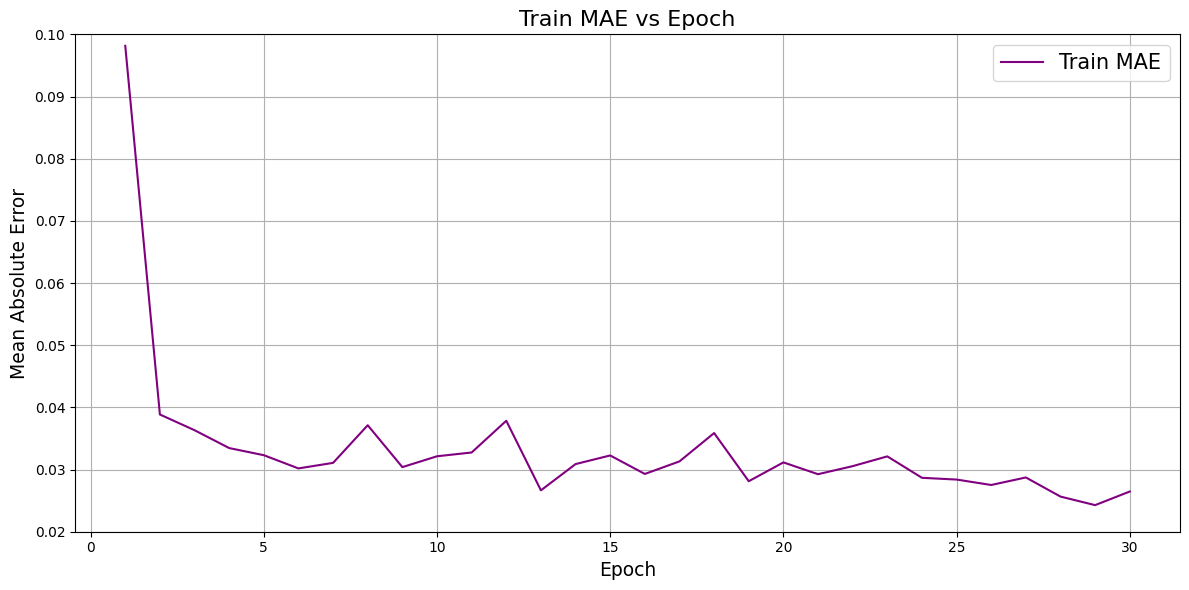

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['mae'],
         label='Train MAE', color='purple')
plt.title('Train MAE vs Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=13.5)
plt.ylabel('Mean Absolute Error', fontsize=13.5)
plt.legend(fontsize=15)
plt.ylim(0.02, 0.10)
plt.grid()
plt.tight_layout()
plt.savefig('Train_mae_vs_epoch.png')
plt.show()

###1.3.3 Graph of Testing **Loss** vs Epoch

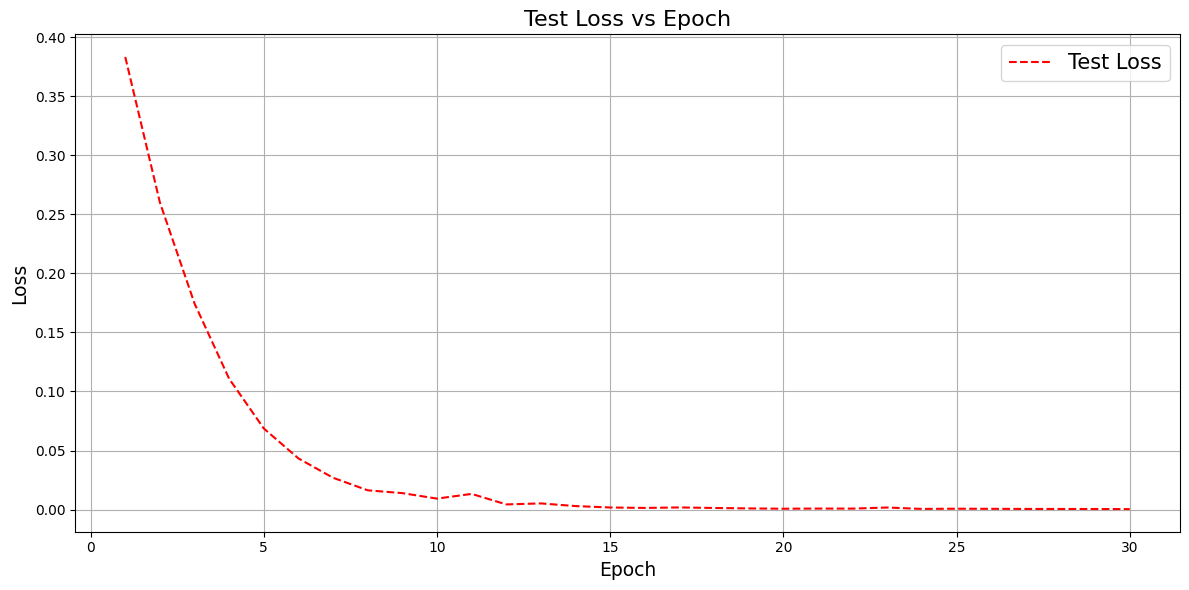

In [150]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['val_loss'],
         label='Test Loss', color='red', linestyle='--')
plt.title('Test Loss vs Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=13.5)
plt.ylabel('Loss', fontsize=13.5)
plt.legend(fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('Test_loss_vs_epoch.png')
plt.show()


###1.3.4 Graph of Testing Mae vs Epoch

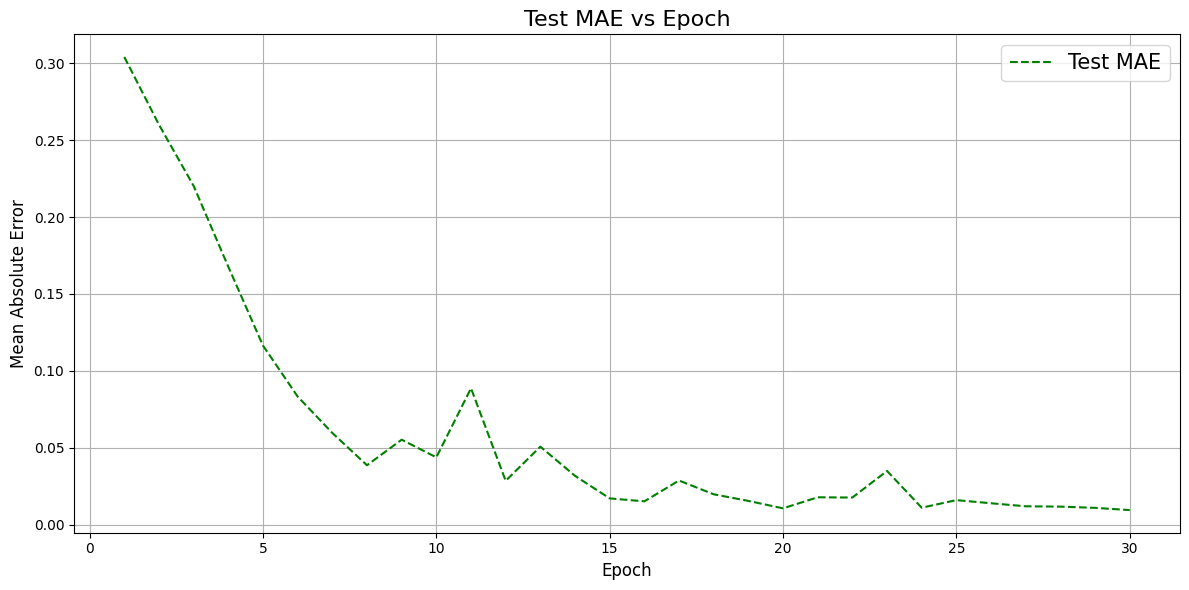

In [151]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), history.history['val_mae'],
         label='Test MAE', color='green', linestyle='--')
plt.title('Test MAE vs Epoch', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.grid()
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Test_mae_vs_epoch.png')
plt.show()

###1.3.5 Evaluation Metrices

In [152]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Inversing transform the scaled predictions and true values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculating of evaluation metrics
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
mape = \
np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Test Evaluation Metrics:
Mean Squared Error (MSE): 0.7762
Root Mean Squared Error (RMSE): 0.8810
Mean Absolute Error (MAE): 0.6419
R-squared (R²): 0.9774
Mean Absolute Percentage Error (MAPE): 1.30%


#SARIMA Model

##2.1  Building a Model


In [107]:
pip install pmdarima

Searching for best ARIMA/SARIMA parameters...
ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 41489.22374611387


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 36470.805138790005


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 20276.88756065647


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 20203.303732602253


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC: 20280.819663164504


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: 20276.212700611486


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: 20212.90568777347


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: 20205.015785966643


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC: 36332.18399568784


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC: 31458.520512242118


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC: 17129.624305766418


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: 16945.38942490487


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC: 17137.50376087537


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC: 17163.391857564475
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC: 16937.045831111238


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC: 16912.807547104232


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC: 31753.02915834193


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC: 28334.19486551136


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 1, 0, 12) - AIC: 15826.691619009918


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC: 15416.23990226475


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC: 15837.77458422094


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC: 15932.611501237605
ARIMA(0, 0, 2)x(1, 1, 0, 12) - AIC: 15437.440967857176


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2)x(1, 1, 1, 12) - AIC: 15418.240066942853
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: 11773.951969574293


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: 11730.389148418582
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC: 14295.709290610743


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC: 11628.325524321584
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 11740.543604461334


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 11632.169047050593


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC: 13000.073466317182


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC: 11630.325994706374
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: 11769.642671022211


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC: 11726.556098051296


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC: 14293.494527766441


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC: 11633.179982271304


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC: 11738.69067004189


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC: 11633.977413659957


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC: 13002.01998787089


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC: 11635.180387194709
ARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC: 11748.635455658612


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC: 11708.487628309405


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC: 14273.185960351102


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC: 11610.816333546903


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC: 11723.47335836314


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC: 11616.746376515832


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC: 12989.072749438294


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC: 11612.816781202302


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC: 11780.111105379037


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC: 11741.890749032362


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC: 14110.07070481857
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC: 11627.240079110845


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC: 11742.126435741306


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC: 11646.386011990351


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC: 12886.42667711823


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC: 11629.240374013787


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC: 11773.674219906285


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC: 11730.394645429198


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC: 14096.178928416648


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC: 11632.323490031406


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC: 11740.299959219323


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC: 11638.215090844938


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC: 12885.356173864073


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC: 11634.324054075974


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC: 11756.627686920641


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC: 11712.658255567381


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 1, 0, 12) - AIC: 14095.03643897226


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC: 11611.2650359829


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC: 11725.136538466177


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC: 11623.987973060048


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC: 12883.769838662662


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC: 11613.265759593562
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC: 11772.553464401059


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC: 11729.083227874838
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC: 14296.500695719842


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC: 11630.32199800888


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC: 11729.154844269568


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC: 11634.133603501192


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC: 12999.489980769555


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC: 11632.212900251368


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC: 11758.478419621184


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC: 11715.64873116101


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC: 14110.546397521219


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC: 11623.679916151035


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC: 11719.542480782651


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC: 11624.685875717516


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC: 12894.2321521861


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC: 11625.680432857454


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC: 11750.530851623778


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC: 11710.397404596337


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC: 14104.218880617096


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC: 11612.814516858063


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC: 11715.24722861129


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC: 11618.273007785501


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC: 12984.730409206679


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC: 11614.815112299033


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC: 11774.210977467637


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC: 11740.695668796563


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 1, 0, 12) - AIC: 14096.28491264841


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC: 11629.236723916169


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC: 11730.813001225148


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC: 11638.581020363046


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(1, 1, 0, 12) - AIC: 12882.8403061979


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0)x(1, 1, 1, 12) - AIC: 11634.373965425584


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC: 11764.220030683873


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC: 11723.251069830265


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 1, 0, 12) - AIC: 13942.729305403547


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(0, 1, 1, 12) - AIC: 11626.352970522981


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC: 11722.900873367305


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC: 11631.565717870277


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC: 12882.558117479894


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC: 11632.724399587487


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 0, 0, 12) - AIC: 11758.594723041047


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC: 11714.655226663292


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 1, 0, 12) - AIC: 14097.427154664994


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(0, 1, 1, 12) - AIC: 11613.264984446447


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 0, 0, 12) - AIC: 11716.858112087048


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC: 11625.951157938882


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 1, 0, 12) - AIC: 12883.068267280645


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC: 11615.789940531882
ARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC: 11756.337357551063


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC: 11714.2071703359


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC: 14281.584011969164


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC: 11617.626961984397


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC: 11712.226547016588


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC: 11623.354458959631


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC: 12984.645901310038


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC: 11616.803908441136


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC: 11756.763770138667


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC: 11713.160664689229


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC: 14107.626042253807


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC: 11616.782070847357


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC: 11713.316196049125


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC: 11624.128864760612


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC: 12982.076878179985


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC: 11618.953392969968


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC: 11751.488997349987


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC: 11710.92520345068


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC: 14104.599858556903


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC: 11613.3783270756


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC: 11713.096330212618


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC: 11620.256223688317


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC: 12802.498934667441


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC: 11615.379423813894

Best ARIMA/SARIMA Model Found:
Order: (0, 1, 2),  Seasonal Order: (0, 1, 1, 12) with AIC: 11610.816333546903


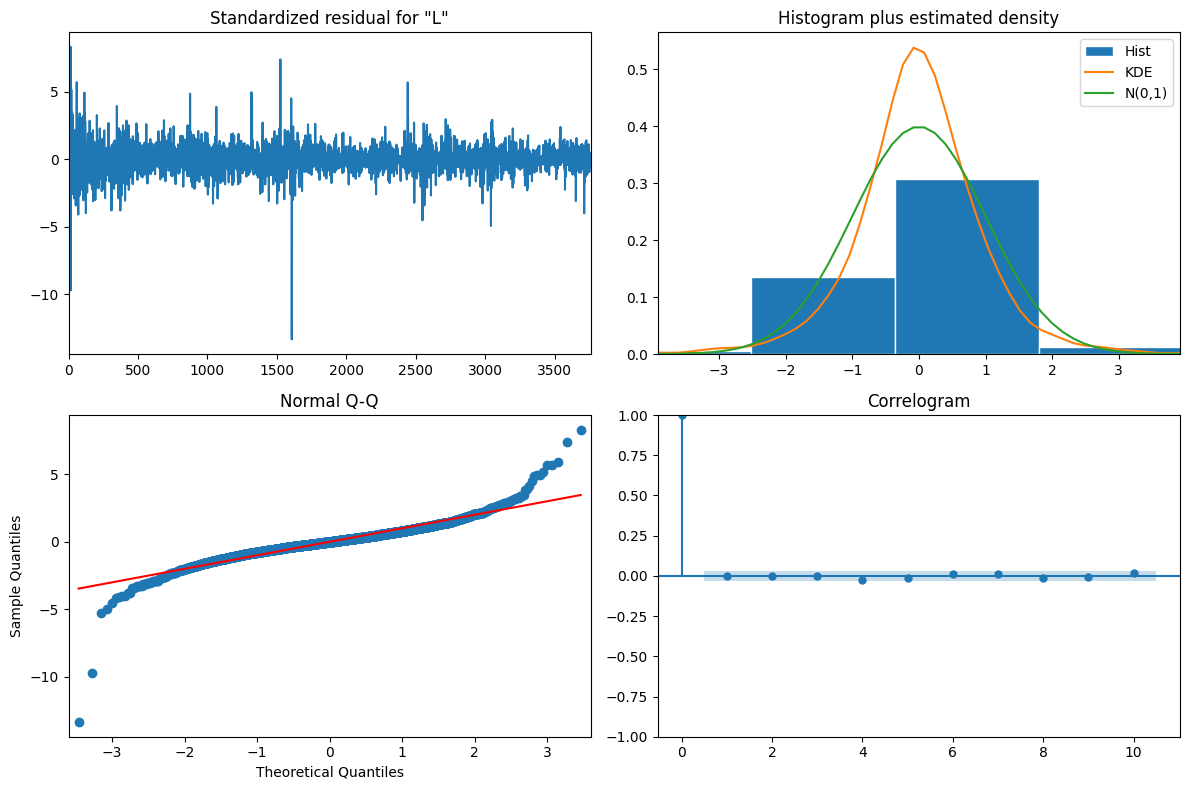

In [108]:
# Making a datacopy bulid a model(to keep original data unaffected)
data1 = data.copy()
close_prices = data1['Close']

# Building model with parameters
p = q = range(0, 3)
d = range(0, 2)
# p stands for The number of lag observations in the model (AR component)
# d stands for The degree of differencing (to make the series stationary)
# q stands for The size of the moving average window (MA component)
pdq = list(itertools.product(p, d, q))
# itertools.product Generate all combinations of p, d, q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in itertools.product(range(0, 2),
                                                                  range(0, 2),
                                                                  range(0, 2))]

min_aic = float('inf')     # start with high AIC value
# In order to store best order
best_order = None
best_seasonal_order = None
best_model = None

print("Searching for best ARIMA/SARIMA parameters...")
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(close_prices, order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < min_aic:
                min_aic = results.aic
                best_order = param
                best_seasonal_order = seasonal_param
                best_model = results
            print(f"ARIMA{param}x{seasonal_param} - AIC: {results.aic}")
        except Exception as e:
          # Ignoring errors (e.g., parameter combinations that don't converge)
            continue

print("\nBest ARIMA/SARIMA Model Found:")
print(f"Order: {best_order}, \
 Seasonal Order: {best_seasonal_order} with AIC: {min_aic}")

# Step 5: Residual Diagnostics
best_model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

## 2.2 Model Summary & Visualization


Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:                               LLOY.L   No. Observations:                 3788
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -5801.408
Date:                              Mon, 06 Jan 2025   AIC                          11610.816
Time:                                      08:32:51   BIC                          11635.745
Sample:                                           0   HQIC                         11619.681
                                             - 3788                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0104      0.008     -1.330      0.183      -0.026       0.005
ma.

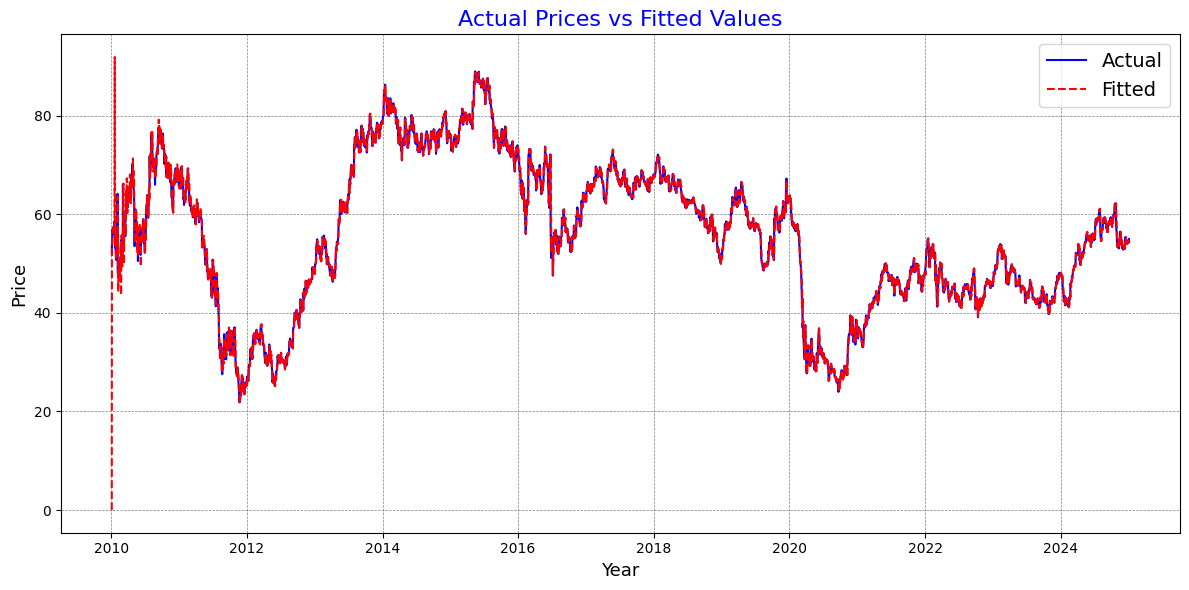

In [109]:
# Display the statistical summary of the fitted model
print("\nModel Summary:")
print(best_model.summary())

print("\n")
print(155*"-")
print("\nPlotting Actual vs Fitted values...\n")
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Actual', color='blue')
plt.plot(best_model.fittedvalues, label='Fitted', color='red', linestyle='--')
plt.title("Actual Prices vs Fitted Values", color='b', fontsize=16)
plt.xlabel("Year", fontsize=13, color='k')
plt.ylabel("Price", fontsize=13, color='k')
plt.legend(fontsize = 14)
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.tight_layout()
plt.show()


## 2.3 Forecasting using SARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


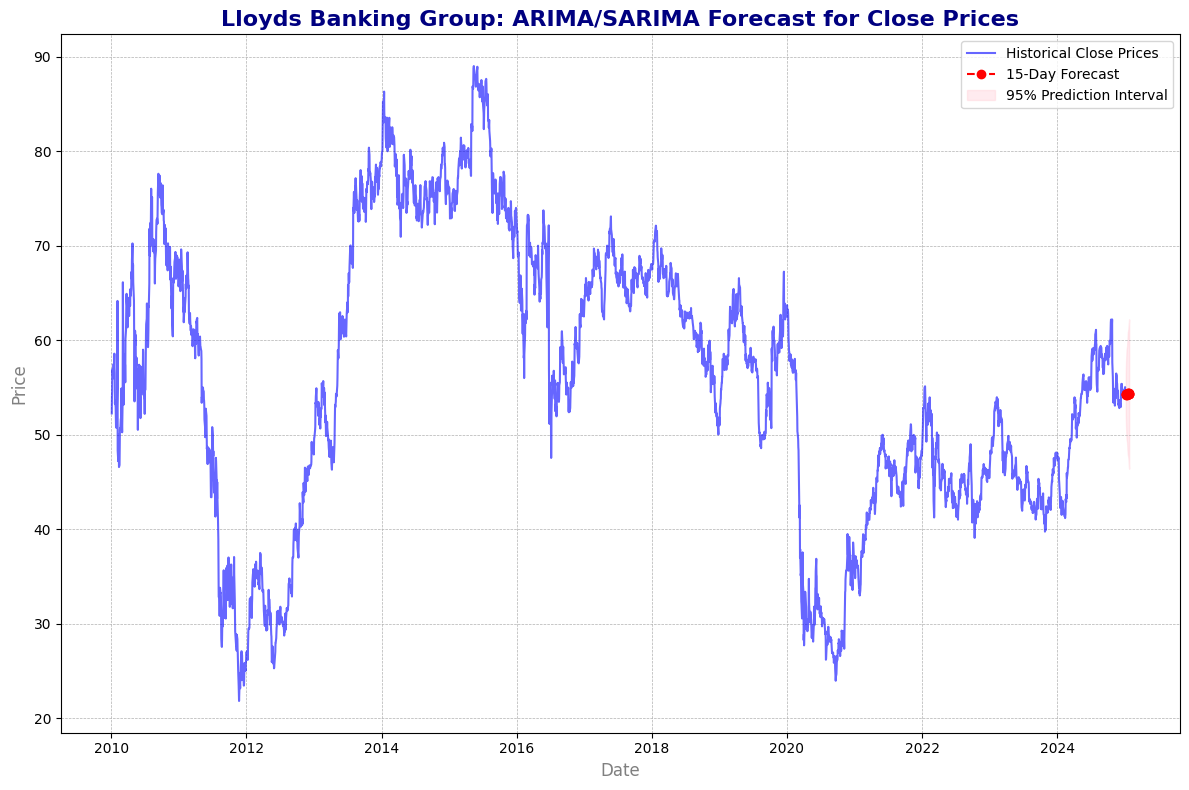

In [110]:
# Generating a 15-day forecast using the best SARIMA model
forecast = best_model.get_forecast(steps=15)
forecast_values = forecast.predicted_mean
 # Extracting the forecasted values (predictions)
forecast_conf_int = forecast.conf_int()  # Confidence intervals for the forecast

future_dates = pd.date_range(start=close_prices.index[-1],
                             periods=16, freq='B')[1:]

# Creating a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Close': forecast_values,
    'Lower Bound': forecast_conf_int.iloc[:, 0],
    'Upper Bound': forecast_conf_int.iloc[:, 1]
    # bound of 95 % confidence interval
})

# Plotting the Historical Data and Forecast
plt.figure(figsize=(12, 8))
plt.plot(close_prices.index, close_prices, label='Historical Close Prices',
         color='blue', alpha=0.6)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'],
         label='15-Day Forecast', color='red', linestyle='--', marker='o')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'],
                 forecast_df['Upper Bound'], color='pink', alpha=0.3,
                 label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA/SARIMA Forecast for Close Prices',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


##2.3.1 Forecasted Graph using SARIMA Model

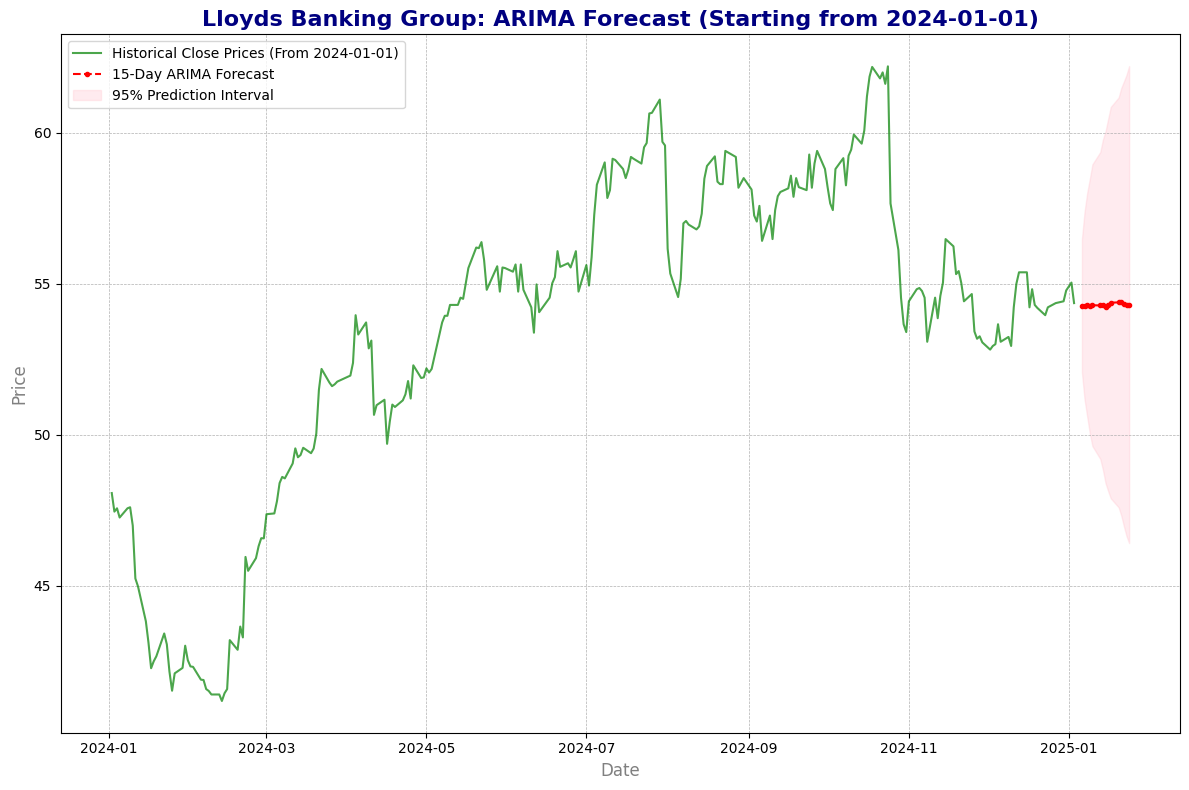

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3788 2025-01-06         54.275941    52.070189    56.481693
3789 2025-01-07         54.277251    51.174027    57.380476
3790 2025-01-08         54.305874    50.607676    58.004071
3791 2025-01-09         54.259214    50.049305    58.469123
3792 2025-01-10         54.290464    49.624631    58.956297
3793 2025-01-13         54.281547    49.200537    59.362556
3794 2025-01-14         54.307069    48.842334    59.771804
3795 2025-01-15         54.224634    48.401407    60.047861
3796 2025-01-16         54.296945    48.136050    60.457840
3797 2025-01-17         54.374443    47.893450    60.855436
3798 2025-01-20         54.383605    47.597595    61.169614
3799 2025-01-21         54.404099    47.326206    61.481992
3800 2025-01-22         54.332772    46.971077    61.694467
3801 2025-01-23         54.281723    46.646804    61.916643
3802 2025-01-24         54.310345    46.411900

In [111]:
# Filtering the historical data from 2024-01-01 onward
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
filtered_data = data[data.index >= '2024-01-01']

# Plotting the data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'],
         label='Historical Close Prices (From 2024-01-01)',
         color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'],
         label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'],
                 forecast_df['Upper Bound'], color='pink', alpha=0.3,
                 label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast (Starting from 2024-01-01)',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


## 2.4 Evaluation Metrices

In [112]:
y_true = close_prices[-15:]  # Extract the values for the last 15 observations
y_forecasted = best_model.predict(start=len(close_prices) - 15,
                                  end = len(close_prices) - 1)

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_forecasted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_forecasted)
mape = np.mean(np.abs((y_true - y_forecasted) / y_true)) * 100
r2 = r2_score(y_true, y_forecasted)

# Printing evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.3272
Root Mean Squared Error (RMSE): 0.5720
Mean Absolute Error (MAE): 0.4553
Mean Absolute Percentage Error (MAPE): nan%
R-squared (R²): -0.7017


# Prophet

In [154]:
data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
Date,,,,,,
2010-01-04,36.779495,52.259998,52.259998,51.099998,51.400002,167623403
2010-01-05,38.025181,54.029999,54.759998,52.200001,52.500000,233026957
2010-01-06,38.419300,54.590000,55.230000,53.169998,55.000000,142079248
2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360
2010-01-08,40.045029,56.900002,57.520000,56.160000,56.990002,178033888
2010-01-11,39.503124,56.130001,57.950001,55.630001,57.799999,169834032
2010-01-12,39.390518,55.970001,56.290001,55.080002,55.590000,189050155
2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072


In [155]:
# If 'Date' is the index, reset it to make it a regular column to make ds & y
if 'Date' not in data.columns:
    data.reset_index(inplace=True)

# Selecting only 'Date' and 'Close' columns
data_for_prophet = data[['Date', 'Close']].copy()

# Rename the columns for Prophet (as per our requirement)
data_for_prophet.columns = ['ds', 'y']

# Droping rows with NaN values (if any)
data_for_prophet.dropna(subset=['ds', 'y'], inplace=True)

# Ensuring that 'y' is numeric
data_for_prophet['y'] = pd.to_numeric(data_for_prophet['y'], errors='coerce')
data_for_prophet.dropna(subset=['y'], inplace=True)

# Converting 'ds' column to datetime with the correct format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'],
                                        format='%d-%m-%Y')

# Display the prepared data
print(data_for_prophet.head(10))

          ds          y
0 2010-01-04  52.259998
1 2010-01-05  54.029999
2 2010-01-06  54.590000
3 2010-01-07  56.930000
4 2010-01-08  56.900002
5 2010-01-11  56.130001
6 2010-01-12  55.970001
7 2010-01-13  56.000000
8 2010-01-14  57.500000
9 2010-01-15  56.779999


## 3.1 Building a Model

In [156]:
# Defining and customizing the Prophet model
prophet_model = Prophet(
    growth="linear",
    #"linear" for a straight-line trend or "logistic" for a capped growth trend.
    seasonality_mode="multiplicative",
    # most common in financial data like stock prices,
    # Different seasonality
    yearly_seasonality=False,
    weekly_seasonality=1,
    daily_seasonality=1,
    changepoint_prior_scale=0.5,
    # Controls the model's flexibility in detecting trend changes.
    seasonality_prior_scale=120,
    # higher values allow more variation flexibility of seasonal components
    interval_width=0.95
    # prediction interval width to 95% for uncertainty estimates in forecasts.
)


prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
"""
period=30.5: Specifies the duration of the cycle (e.g., monthly).
fourier_order=5: Controls the flexibility of the seasonality model in
capturing detailed patterns within the cycle.
"""
prophet_model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)

# Adding holiday effects for the UK
prophet_model.add_country_holidays(country_name='UK')

# Fitting the model
prophet_model.fit(data_for_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpffyp3zt3/yoaicy1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpffyp3zt3/v1pu7vs7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9500', 'data', 'file=/tmp/tmpffyp3zt3/yoaicy1s.json', 'init=/tmp/tmpffyp3zt3/v1pu7vs7.json', 'output', 'file=/tmp/tmpffyp3zt3/prophet_modelocg566qc/prophet_model-20250106091058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## 3.2 Forecasting using Prophet Model



In [159]:
# Forecasting for the next 15 business days
future = prophet_model.make_future_dataframe(periods=15, freq='B')
forecast = prophet_model.predict(future)

# Extracting the forecasted values
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Filtering the  future predictions (next 15 days)
future_predictions = forecasted_values      \
 [forecasted_values['ds'] > data_for_prophet['ds'].max()]
print(future_predictions)

             ds       yhat  yhat_lower  yhat_upper
3788 2025-01-06  52.874194   44.960355   60.772954
3789 2025-01-07  53.073674   45.617234   61.042758
3790 2025-01-08  53.142391   45.855453   60.870804
3791 2025-01-09  53.103155   44.924875   61.058271
3792 2025-01-10  53.062873   44.978652   60.862146
3793 2025-01-13  53.422326   45.491690   61.128556
3794 2025-01-14  53.490502   45.477177   60.778651
3795 2025-01-15  53.444813   46.258025   60.944721
3796 2025-01-16  53.348907   46.068458   61.769499
3797 2025-01-17  53.298142   46.144091   60.815569
3798 2025-01-20  53.610313   45.440618   61.287726
3799 2025-01-21  53.707847   45.006467   61.744015
3800 2025-01-22  53.740794   45.848280   61.770353
3801 2025-01-23  53.714127   45.845974   61.835773
3802 2025-01-24  53.642660   45.701316   61.278378


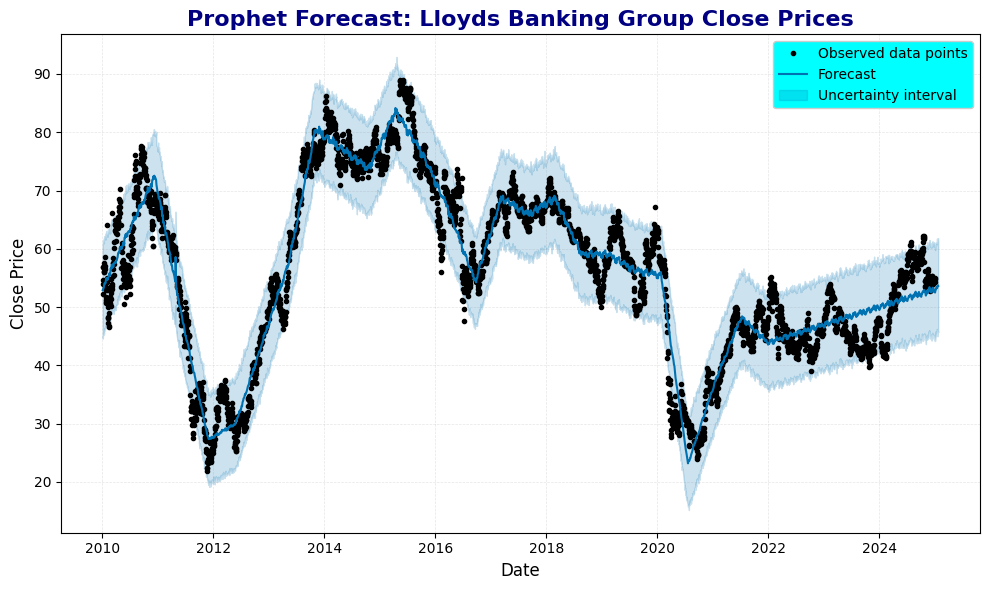

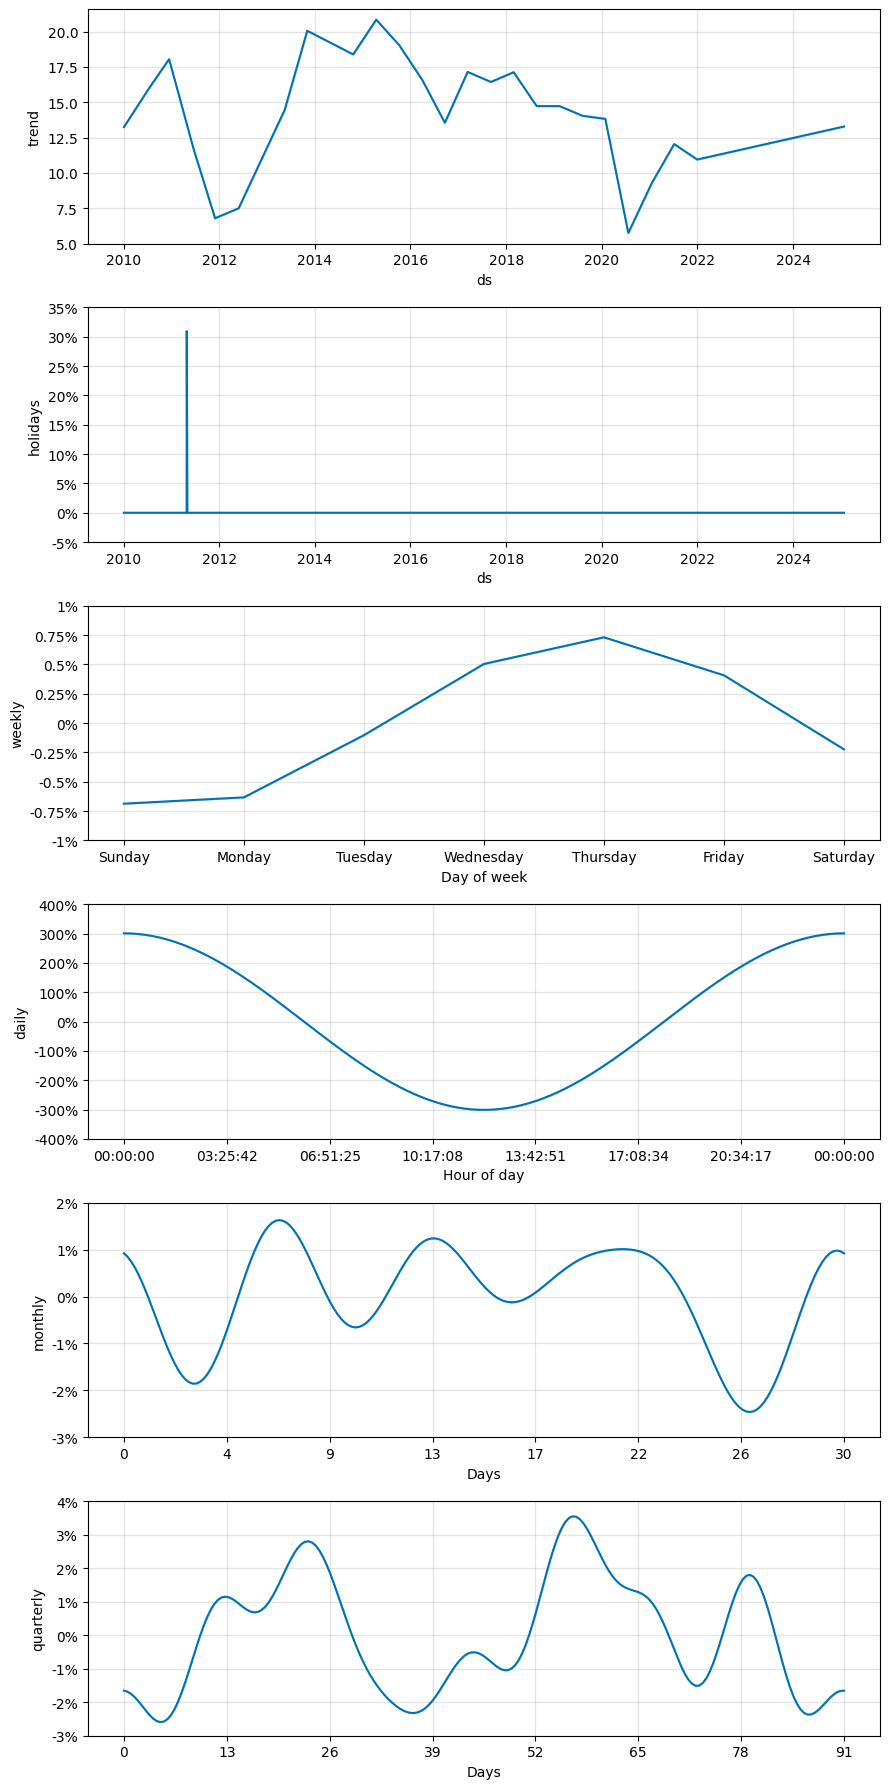

***********************************************************************************************************************************************************


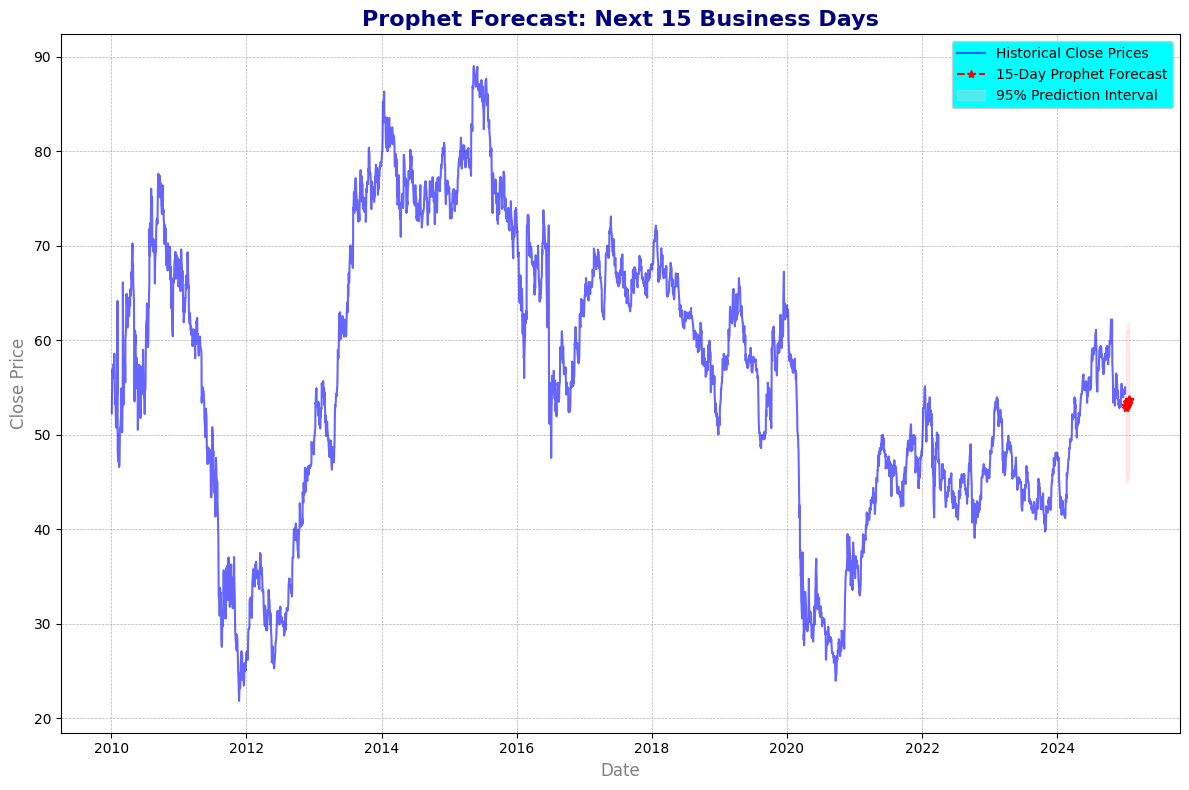

In [160]:
# Plotting the  historical data and forecast data
prophet_model.plot(forecast)
plt.title('Prophet Forecast: Lloyds Banking Group Close Prices',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='k')
plt.ylabel('Close Price', fontsize=12, color='k')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()

legend = plt.legend(frameon=True, loc='upper right', fontsize=10)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)

plt.show()

# Component plots
print("\n")
prophet_model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Plotting future predictions only
print(155*"*")
plt.figure(figsize=(12, 8))
plt.plot(data_for_prophet['ds'], data_for_prophet['y'],
         label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_predictions['ds'], future_predictions['yhat'], color='red',
         label='15-Day Prophet Forecast', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Prophet Forecast: Next 15 Business Days', fontsize=16, color='navy',
          weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
legend = plt.legend(frameon=True, loc='upper right', fontsize=10)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

##3.2.1 Forecasted Graph using Prophet Model

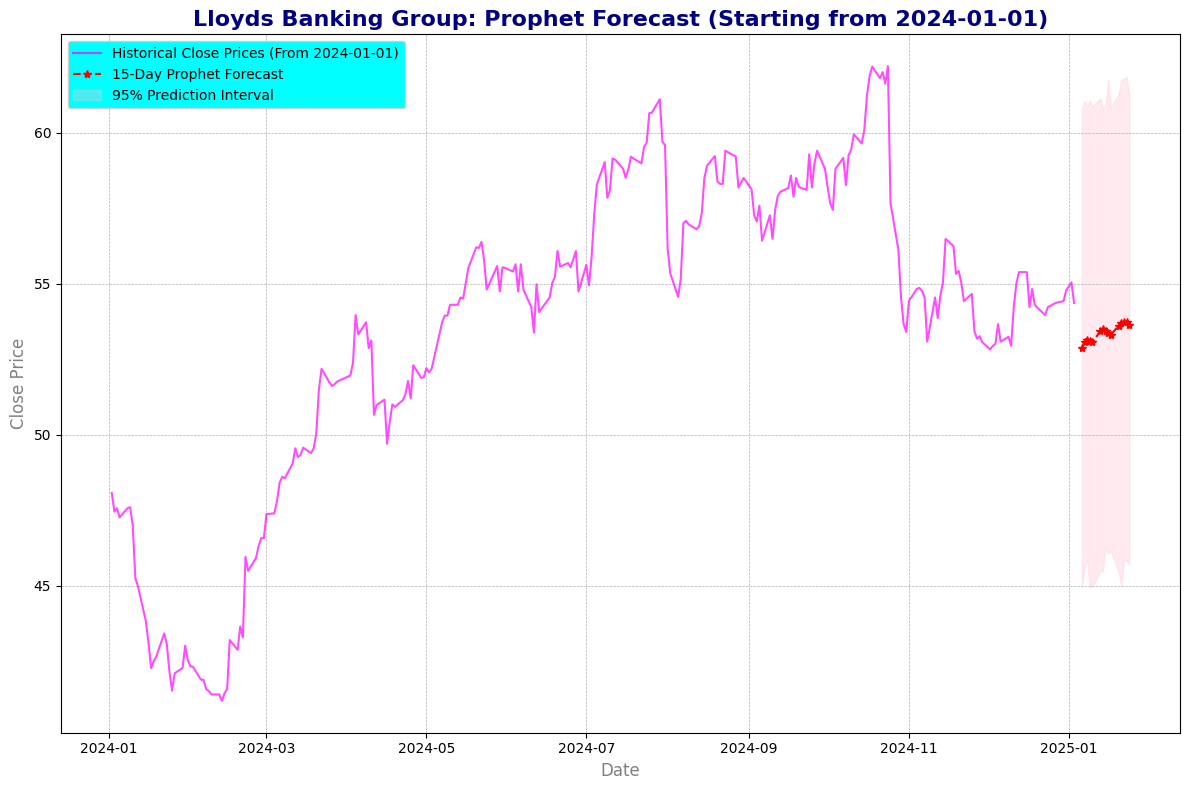

Forecasted Close Prices for the Next 15 Business Days:
             ds       yhat  yhat_lower  yhat_upper
3788 2025-01-06  52.874194   44.960355   60.772954
3789 2025-01-07  53.073674   45.617234   61.042758
3790 2025-01-08  53.142391   45.855453   60.870804
3791 2025-01-09  53.103155   44.924875   61.058271
3792 2025-01-10  53.062873   44.978652   60.862146
3793 2025-01-13  53.422326   45.491690   61.128556
3794 2025-01-14  53.490502   45.477177   60.778651
3795 2025-01-15  53.444813   46.258025   60.944721
3796 2025-01-16  53.348907   46.068458   61.769499
3797 2025-01-17  53.298142   46.144091   60.815569
3798 2025-01-20  53.610313   45.440618   61.287726
3799 2025-01-21  53.707847   45.006467   61.744015
3800 2025-01-22  53.740794   45.848280   61.770353
3801 2025-01-23  53.714127   45.845974   61.835773
3802 2025-01-24  53.642660   45.701316   61.278378


In [161]:
# Ensure the 'ds' column is in datetime format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'])

# Filter the historical data from 2024-01-01 onward
filtered_data_prophet = data_for_prophet[data_for_prophet['ds'] >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data_prophet['ds'], filtered_data_prophet['y'], alpha=0.7,
         label='Historical Close Prices (From 2024-01-01)', color='magenta')
plt.plot(future_predictions['ds'], future_predictions['yhat'], color='red',
         label='15-Day Prophet Forecast', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: Prophet Forecast (Starting from 2024-01-01)',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
legend = plt.legend(frameon=True, loc='upper left', fontsize=10)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)


## 3.3 Evaluation Metrices

In [162]:
# Calculating different errors
# Only include predictions corresponding to historical data for accu. evaluation
historical_forecast = forecast[forecast['ds'] <= data_for_prophet['ds'].max()]

rmse = np.sqrt(mean_squared_error(data_for_prophet['y'],
                                  historical_forecast['yhat']))
mse = mean_squared_error(data_for_prophet['y'], historical_forecast['yhat'])
mae = mean_absolute_error(data_for_prophet['y'], historical_forecast['yhat'])
r2 = r2_score(data_for_prophet['y'], historical_forecast['yhat'])
mape = np.mean(
np.abs((data_for_prophet['y'] - historical_forecast['yhat']) \
       / data_for_prophet['y'])
) * 100

# Printing evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 15.7987
Root Mean Squared Error (RMSE): 3.9748
Mean Absolute Error (MAE): 3.1149
Mean Absolute Percentage Error (MAPE): 6.23%
R-squared (R²): 0.9286


# HOLT - WINTERS Model

In [163]:
data.head(10)

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L
0,2010-01-04,36.779495,52.259998,52.259998,51.099998,51.400002,167623403
1,2010-01-05,38.025181,54.029999,54.759998,52.200001,52.500000,233026957
2,2010-01-06,38.419300,54.590000,55.230000,53.169998,55.000000,142079248
3,2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360
4,2010-01-08,40.045029,56.900002,57.520000,56.160000,56.990002,178033888
5,2010-01-11,39.503124,56.130001,57.950001,55.630001,57.799999,169834032
6,2010-01-12,39.390518,55.970001,56.290001,55.080002,55.590000,189050155
7,2010-01-13,39.411633,56.000000,56.200001,55.160000,55.639999,117598072
8,2010-01-14,40.467300,57.500000,58.000000,56.580002,57.000000,225878876



## 4.1 Building a Model

In [164]:
#  Ensuring that date is in the proper format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Using the full dataset and rename it to data_hw to unaffect the main data
data_hw = data.copy()

# Build the Holt-Winters Model using the full dataset
holt_winters_model = ExponentialSmoothing(
    data_hw['Close'],
    trend='mul',            # Multiplicative trend
    seasonal='mul',         # Multiplicative seasonality
    seasonal_periods=12,    # Quarterly seasonality (example)
    damped_trend=True
    # Adds a damped trend to prevent over-extrapolation in long-term forecasts.
)

# Adjust seasonal_periods based on the data pattern
holt_winters_model_fit = holt_winters_model.fit(
    smoothing_level=None,      # Auto-optimize for alpha, beta and gamma
    smoothing_slope=None,
    smoothing_seasonal=None,
    remove_bias=True,  # Removes any bias from the forecast to improve accuracy.
)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


## 4.2 Forecasting using HOLT - WINTERS Model



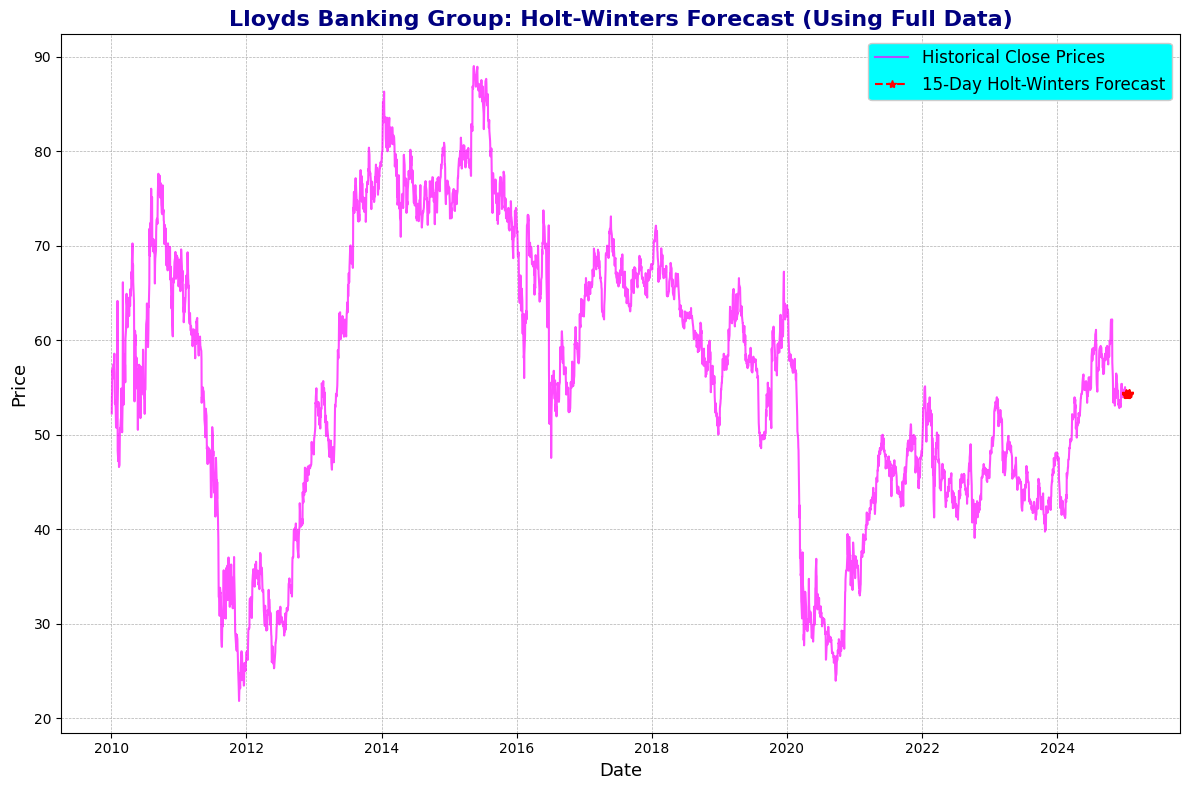

In [165]:
# Forecasting the next 15 business days
forecast_holt_winters = holt_winters_model_fit.forecast(steps=15)

# Create a DataFrame to hold the forecasted values
forecast_dates = pd.date_range(start=data_hw['Date'].max(),
                               periods=16, freq='B')[1:]
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Close': forecast_holt_winters
})

# Plot historical data and forecast
plt.figure(figsize=(12, 8))
plt.plot(data_hw['Date'], data_hw['Close'], label='Historical Close Prices',
         color='magenta', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], color='red',
         label='15-Day Holt-Winters Forecast', linestyle='--', marker='*')
plt.title('Lloyds Banking Group: Holt-Winters Forecast (Using Full Data)',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=13, color='k')
plt.ylabel('Price', fontsize=13, color='k')
legend = plt.legend(frameon=True, loc='upper right', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

##4.2.1 Forecasted Graph using HOLT - WINTERS Model

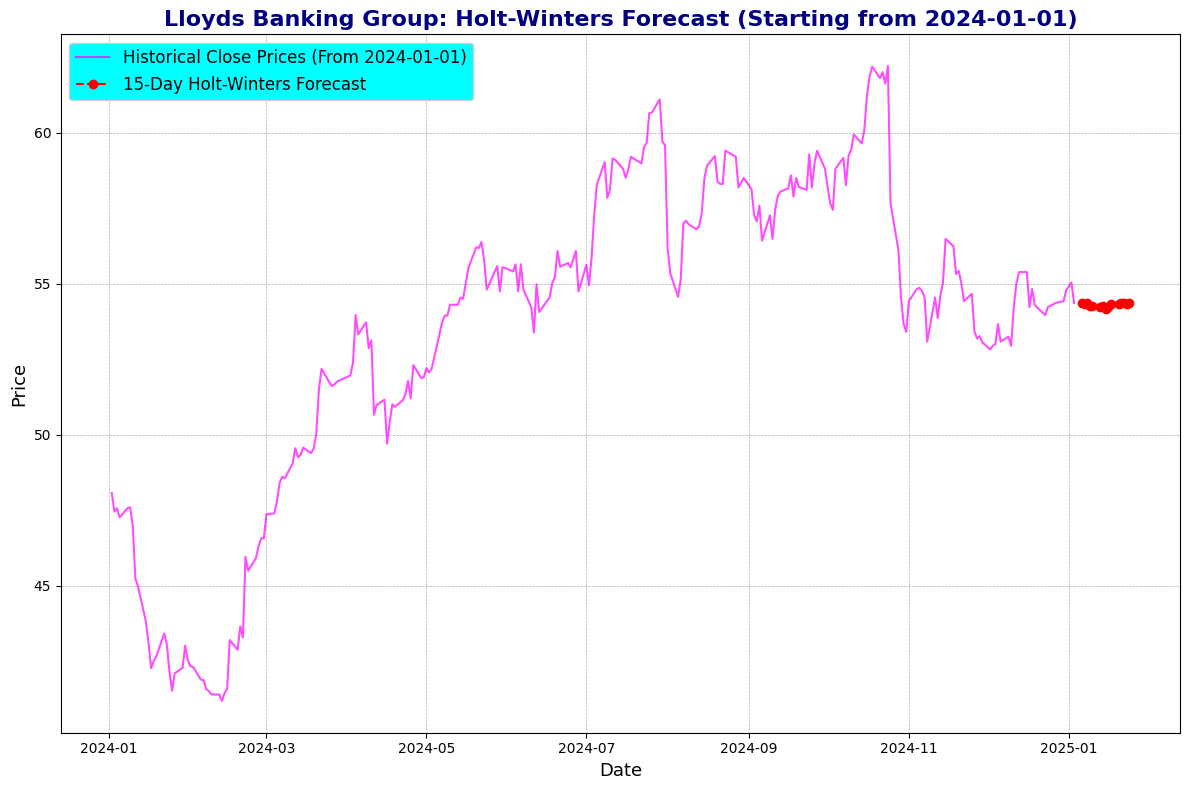

In [166]:
# Ensure 'Date' is in datetime format and set it as the index
data_hw['Date'] = pd.to_datetime(data_hw['Date'], errors='coerce')
data_hw.set_index('Date', inplace=True)

# Filter historical data from January 1, 2024
filtered_df = data_hw[data_hw.index >= '2024-01-01']

# Plot filtered historical data and forecast starting from January 1, 2024
plt.figure(figsize=(12, 8))
plt.plot(filtered_df.index, filtered_df['Close'], alpha=0.7,
         label='Historical Close Prices (From 2024-01-01)', color='magenta')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], color='red',
         label='15-Day Holt-Winters Forecast', linestyle='--', marker='o')
plt.title('Lloyds Banking Group: Holt-Winters Forecast (Starting from 2024-01-01)',
          fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=13, color='k')
plt.ylabel('Price', fontsize=13, color='k')
legend = plt.legend(frameon=True, loc='upper left', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
frame = legend.get_frame()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## 4.3 Evaluation Metrices

In [167]:
original_values = data_hw['Close']
predicted_hw_values = forecast_df['Forecasted Close']

# Calculating evaluation metrics
mse = mean_squared_error(original_values[-15:], predicted_hw_values)
rmse = math.sqrt(mse)
mae = mean_absolute_error(original_values[-15:], predicted_hw_values)
r2 = r2_score(original_values[-15:], predicted_hw_values)

mape = np.mean(np.abs((original_values[-15:] - predicted_hw_values) \
                      / original_values[-15:])) * 100
# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Test Evaluation Metrics:
Mean Squared Error (MSE): 0.2592
Root Mean Squared Error (RMSE): 0.5091
Mean Absolute Error (MAE): 0.3484
R-squared (R²): -0.3480
Mean Absolute Percentage Error (MAPE): nan%
